# Linear Regression
### Notebook by [Kevin Huang](https://kevin8523.github.io/)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

***Set up dataset into a dataframe to practice ML***

In [2]:
# datasets
boston = load_boston()

In [3]:
# Set up data in a dataframe like a realworld problem
df = pd.DataFrame(data = boston.data)

In [4]:
# Name columns
df.columns = boston.feature_names

In [5]:
# Add Price feature >> Target or Y Variable
df["PRICE"] = boston.target

In [6]:
# Convert Chas to Categorical for practice
df['CHAS'] = df['CHAS'].replace([0], 'Charles River')
df['CHAS'] = df['CHAS'].replace([1], 'Tract Bounds River')

In [7]:
# Show values on a category
df["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

***Description of Variables***

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. PRICE - Median value of owner-occupied homes in $1000's

***Summary Statistics***

In [8]:
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,Charles River,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,Charles River,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,Charles River,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,Charles River,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,Charles River,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


***Split the dataset: Train & test set*** <br/>

Only need to do this if you're manipulating the dataset (Filling missing data, transformation, etc). When splitting between the training and test set, you want to keep it separate

In [9]:
# Randomize dataset for split
df = df.reindex(np.random.permutation(df.index)) # randomizes index
df = df.sort_index() # sorts index 
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,18.81100,0.0,18.10,Charles River,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9
1,20.08490,0.0,18.10,Charles River,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8
2,0.47547,0.0,9.90,Charles River,0.544,6.113,58.8,4.0019,4.0,304.0,18.4,396.23,12.73,21.0
3,0.10959,0.0,11.93,Charles River,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
4,0.08873,21.0,5.64,Charles River,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7


In [10]:
# Split dataset to train & test set
train = df.iloc[:354, :]
test = df.iloc[354:, :]
print(train.shape)
print(test.shape)

(354, 14)
(152, 14)


In [11]:
# Removes PRICE from train & test set and labels it 
y_train = train.pop('PRICE').values
y_test = test.pop('PRICE').values

***Setup data for ML: Train set***

***3 Step Process***: Import, Instantiate, Fit 

In [12]:
# Import Libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### Transforming Categorical Columns

In [13]:
# Imputate Missing values
cat_si_step = ('si', SimpleImputer(strategy='constant',
               fill_value='MISSING'))
# One hot encoding
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False,
                handle_unknown='ignore'))
cat_steps = [cat_si_step, cat_ohe_step]

# Create pipeline for categorical data
cat_pipe = Pipeline(cat_steps)
cat_cols = ['CHAS']

# Transform the categorical columns 
# Ran below as well
cat_transformers = [('cat', cat_pipe, cat_cols)]
ct = ColumnTransformer(transformers=cat_transformers)

#### Transforming Numeric Columns

In [14]:
# Data types for the dataset
kinds = np.array([dt.kind for dt in train.dtypes])

In [15]:
# Creates all the columns from the training data
all_columns = train.columns.values

# Selects all non Objects >> numeric
is_num = kinds != 'O'

# Selects all the columns that are numeric
num_cols = all_columns[is_num]

# Gets all of the columns not numeric >> Categorical
cat_cols = all_columns[~is_num]

In [16]:
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# Impute & Normalize data
num_si_step = ('si', SimpleImputer(strategy='median'))
num_ss_step = ('ss', StandardScaler())
num_steps = [num_si_step, num_ss_step]

# Create pipeline for numeric data
num_pipe = Pipeline(num_steps)

# Transforms the numerical columns
# Ran below
num_transformers = [('num', num_pipe, num_cols)]
ct = ColumnTransformer(transformers=num_transformers)
X_num_transformed = ct.fit_transform(train)
X_num_transformed.shape

(354, 12)

#### Transforming Both Columns

In [17]:
col_transformers = [('cat', cat_pipe, cat_cols),
                ('num', num_pipe, num_cols)]
ct = ColumnTransformer(transformers=col_transformers)
X = ct.fit_transform(train)
X.shape

(354, 14)

#### Apply to the Test Set

In [18]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
ml_pipe = Pipeline([('transform', ct), ('lm', LinearRegression())])
ml_pipe.fit(train, y_train)

Pipeline(memory=None,
     steps=[('transform', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('si', SimpleImputer(copy=True, fill_value='MISSING', missing_values=nan,
       strategy='constant', verbos...), ('lm', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [19]:
# Predict
y_pred = ml_pipe.predict(test)
y_pred

array([11.32735458, 32.99874829, 17.9140779 , 23.25732207, 23.02855571,
       31.83315956, 19.20816706, 16.98176238, 21.94333608, 24.27552941,
       26.66387473, 29.9595131 , 21.16397447,  4.40197018, 23.75708542,
       23.0135514 , 20.93629908, 16.41915253, 12.52421897, 14.94934599,
       16.67608962, 21.71389978, 20.71803387, 19.30952391, 36.68495155,
       31.71773417, 19.91373296, 20.77884266, 35.56930438, 15.63378779,
       32.6717313 , 21.04896087, 28.61760813, 25.28533246, 36.60487468,
       12.93384377, 18.91129504, 12.77391298, 22.28673569, 21.31428598,
       36.18210631, 22.43613884, 28.19284284, 19.9369998 , 33.62448407,
       35.69416712, 20.30921027, 22.13704134, 27.90437519, 33.09671164,
       23.0805422 , 46.123299  , 30.53599705, 19.0196707 , 18.20417193,
       36.00979546, 21.01056649, 17.0533191 , 18.17136013, 18.4993524 ,
       40.87732735, 32.99126417, 33.54262782, 12.52050853, 24.38500941,
       23.58840369, 21.24461382,  6.53738134, 20.66043796, 19.66

In [20]:
# Score
print(ml_pipe.score(train,y_train))
print(ml_pipe.score(test,y_test))

0.7688715496784455
0.665306526586543


***Apply ML***

In [21]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(mse)

32.757787046720125


***Visualize Data***

In [22]:
# Import Libraries
import matplotlib.pyplot as plt

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

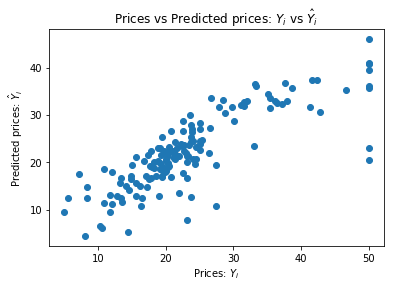

In [23]:
# Plot Visual
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

### Update Model by building optimal model using Backward Elimination

In [24]:
import statsmodels.formula.api as sm

In [25]:
# Copy df
df2 = df.copy()

# Convert Chas to numeric for Backward Elim
df2['CHAS'] = df2['CHAS'].replace(['Charles River'], 0)
df2['CHAS'] = df2['CHAS'].replace(['Tract Bounds River'], 1)

In [26]:
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9
1,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8
2,0.47547,0.0,9.90,0,0.544,6.113,58.8,4.0019,4.0,304.0,18.4,396.23,12.73,21.0
3,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
4,0.08873,21.0,5.64,0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7


In [27]:
train = df2.iloc[:354, :]
test = df2.iloc[354:, :]

In [28]:
X = train.iloc[:, :-1].values
y = train.iloc[:, 13].values

In [29]:
y.shape

(354,)

***For Backwards Elimination in statsmodels, it doesn't take into account the b0 constant term. We need to add it manually by adding the array 1 to our X***

In [30]:
# np.append(arr=X
#          , values = np.ones(shape=(506,1)).astype(int)
#          , axis=1) # Puts array 1 at the END of the the array X
X_var = np.append(arr=np.ones(shape=(354,1)).astype(int)
         , values = X
         , axis = 1) # Flips it so array 1 is at the front of array X
print(X_var.shape)
X_var

(354, 14)


array([[1.00000e+00, 1.88110e+01, 0.00000e+00, ..., 2.02000e+01,
        2.87900e+01, 3.43700e+01],
       [1.00000e+00, 2.00849e+01, 0.00000e+00, ..., 2.02000e+01,
        2.85830e+02, 3.06300e+01],
       [1.00000e+00, 4.75470e-01, 0.00000e+00, ..., 1.84000e+01,
        3.96230e+02, 1.27300e+01],
       ...,
       [1.00000e+00, 3.55100e-02, 2.50000e+01, ..., 1.90000e+01,
        3.90640e+02, 7.51000e+00],
       [1.00000e+00, 1.11604e+01, 0.00000e+00, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [1.00000e+00, 1.14250e-01, 0.00000e+00, ..., 1.64000e+01,
        3.93740e+02, 1.05000e+01]])

In [31]:
# Optimal Features for model >> Statisically sig. Variables
X_opt = X_var[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]

In [32]:
# Create the model again since we're using a diff library
# Initialize the model
regressor_OLS = sm.OLS(endog=y , exog=X_opt).fit()

In [33]:
# Backwards Elim process
# >> Remove highest p-value until < .05 or satisfied
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     87.00
Date:                Sat, 13 Oct 2018   Prob (F-statistic):           1.22e-99
Time:                        22:01:04   Log-Likelihood:                -1014.3
No. Observations:                 354   AIC:                             2057.
Df Residuals:                     340   BIC:                             2111.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5670      6.061      4.713      0.000      16.645      40.489
x1            -0.0765      0.034     -2.227      0.027      -0.144      -0.009
x2             0.0503      0.015      3.276      0.001       0.020       0.081
x3            -0.0071      0.066     -0.107      0.915      -0.137       0.123
x4             3.9504      0.928      4.257      0.000       2.125       5.776
x5           -15.2394      4.158     -3.665      0.000     -23.417      -7.061
x6             4.3819      0.520      8.430      0.000       3.359       5.404
x7            -0.0096      0.015     -0.648      0.517      -0.039       0.020
x8            -1.4131      0.229     -6.178      0.000      -1.863      -0.963
x9             0.2277      0.072      3.169      0.002       0.086       0.369
x10           -0.0111      0.004     -2.799      0.005      -0.019      -0.003
x11           -0.8749      0.142     -6.150      0.000      -1.155      -0.595
x12            0.0107      0.003      3.643      0.000       0.005       0.016
x13           -0.4137      0.060     -6.887      0.000      -0.532      -0.296
==============================================================================
Omnibus:                      112.751   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              501.936
Skew:                           1.296   Prob(JB):                    1.01e-109
Kurtosis:                       8.226   Cond. No.                     1.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# Optimal Features for model >> Statisically sig. Variables
X_opt = X_var[:,[0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13]]

# Create the model again since we're using a diff library
# Initialize the model
regressor_OLS = sm.OLS(endog=y , exog=X_opt).fit()

# Begin Backwards Elimination >> Remove highest p-value
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sat, 13 Oct 2018   Prob (F-statistic):          1.45e-101
Time:                        22:01:12   Log-Likelihood:                -1014.5
No. Observations:                 354   AIC:                             2053.
Df Residuals:                     342   BIC:                             2099.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.1799      5.972      4.886      0.000      17.434      40.926
x1            -0.0764      0.034     -2.229      0.026      -0.144      -0.009
x2             0.0513      0.015      3.387      0.001       0.022       0.081
x3             3.8853      0.913      4.258      0.000       2.090       5.680
x4           -16.1681      3.810     -4.244      0.000     -23.662      -8.674
x5             4.2973      0.499      8.611      0.000       3.316       5.279
x6            -1.3666      0.215     -6.352      0.000      -1.790      -0.943
x7             0.2336      0.069      3.399      0.001       0.098       0.369
x8            -0.0113      0.004     -3.172      0.002      -0.018      -0.004
x9            -0.8873      0.140     -6.343      0.000      -1.162      -0.612
x10            0.0105      0.003      3.622      0.000       0.005       0.016
x11           -0.4298      0.055     -7.858      0.000      -0.537      -0.322
==============================================================================
Omnibus:                      109.721   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              471.915
Skew:                           1.270   Prob(JB):                    3.35e-103
Kurtosis:                       8.054   Cond. No.                     1.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Using updated variables, re-run regression for the optimal model

In [35]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,18.81100,0.0,18.10,Charles River,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9
1,20.08490,0.0,18.10,Charles River,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8
2,0.47547,0.0,9.90,Charles River,0.544,6.113,58.8,4.0019,4.0,304.0,18.4,396.23,12.73,21.0
3,0.10959,0.0,11.93,Charles River,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
4,0.08873,21.0,5.64,Charles River,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7


In [36]:
# Update the dataframe to only select sig. variables
df_v2 = df.iloc[:, :]
df_v2 = df_v2.drop(['INDUS','AGE']
          ,axis=1
          ,inplace=False)

In [37]:
# Confirm correct Columns removed
df_v2.head()

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,18.81100,0.0,Charles River,0.597,4.628,1.5539,24.0,666.0,20.2,28.79,34.37,17.9
1,20.08490,0.0,Charles River,0.700,4.368,1.4395,24.0,666.0,20.2,285.83,30.63,8.8
2,0.47547,0.0,Charles River,0.544,6.113,4.0019,4.0,304.0,18.4,396.23,12.73,21.0
3,0.10959,0.0,Charles River,0.573,6.794,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
4,0.08873,21.0,Charles River,0.439,5.963,6.8147,4.0,243.0,16.8,395.56,13.45,19.7


<br/>

### Exact same steps as the baseline model, just with the unsignificant variables removed

In [38]:
# Split dataset to train & test set
train = df_v2.iloc[:354, :]
test = df_v2.iloc[354:, :]
print(train.shape)
print(test.shape)

(354, 12)
(152, 12)


In [39]:
# Removes PRICE from train & test set and labels it 
y_train = train.pop('PRICE').values
y_test = test.pop('PRICE').values

***Setup data for ML: Train set***

***3 Step Process***: Import, Instantiate, Fit 

In [40]:
# Import Libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### Transforming Categorical Columns

In [41]:
# Imputate Missing values
cat_si_step = ('si', SimpleImputer(strategy='constant',
               fill_value='MISSING'))
# One hot encoding
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False,
                handle_unknown='ignore'))
cat_steps = [cat_si_step, cat_ohe_step]

# Create pipeline for categorical data
cat_pipe = Pipeline(cat_steps)
cat_cols = ['CHAS']

# Transform the categorical columns 
# Ran below as well
cat_transformers = [('cat', cat_pipe, cat_cols)]
ct = ColumnTransformer(transformers=cat_transformers)

#### Transforming Numeric Columns

In [42]:
# Data types for the dataset
kinds = np.array([dt.kind for dt in train.dtypes])

In [43]:
# Creates all the columns from the training data
all_columns = train.columns.values

# Selects all non Objects >> numeric
is_num = kinds != 'O'

# Selects all the columns that are numeric
num_cols = all_columns[is_num]

# Gets all of the columns not numeric >> Categorical
cat_cols = all_columns[~is_num]

In [44]:
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler
# Impute & Normalize data
num_si_step = ('si', SimpleImputer(strategy='median'))
num_ss_step = ('ss', StandardScaler())
num_steps = [num_si_step, num_ss_step]

# Create pipeline for numeric data
num_pipe = Pipeline(num_steps)

# Transforms the numerical columns
# Ran below
num_transformers = [('num', num_pipe, num_cols)]
ct = ColumnTransformer(transformers=num_transformers)
X_num_transformed = ct.fit_transform(train)
X_num_transformed.shape

(354, 10)

#### Transforming Both Columns

In [45]:
col_transformers = [('cat', cat_pipe, cat_cols),
                ('num', num_pipe, num_cols)]
ct = ColumnTransformer(transformers=col_transformers)
X = ct.fit_transform(train)
X.shape

(354, 12)

#### Apply to the Test Set

In [46]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
ml_pipe = Pipeline([('transform', ct), ('lm', LinearRegression())])
ml_pipe.fit(train, y_train)

Pipeline(memory=None,
     steps=[('transform', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('cat', Pipeline(memory=None,
     steps=[('si', SimpleImputer(copy=True, fill_value='MISSING', missing_values=nan,
       strategy='constant', verbos...), ('lm', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [47]:
# Predict
y_pred = ml_pipe.predict(test)
y_pred

array([11.27843099, 32.81312034, 17.92354109, 23.50801453, 22.96701805,
       31.93932121, 19.63843496, 17.08452597, 22.01148178, 24.32229842,
       26.6091156 , 30.15151174, 21.26162775,  4.38659326, 23.89368081,
       23.30093464, 20.85789343, 16.39248083, 12.46234834, 14.90803616,
       16.5896487 , 21.8660929 , 20.83075698, 19.58283379, 36.86193035,
       32.01033979, 19.86950055, 20.81966311, 35.63054627, 15.71305662,
       32.90575938, 20.81114354, 28.78697657, 25.30982271, 36.52476705,
       13.07071219, 18.98612105, 12.7114581 , 22.4413755 , 21.06462113,
       36.40142576, 22.37906305, 28.0417494 , 20.02533533, 33.72204594,
       35.52211355, 20.10800798, 22.10351263, 27.73854564, 33.01653324,
       23.31626257, 45.94942905, 30.25844544, 19.03548778, 18.2137792 ,
       36.08215248, 20.86037865, 17.02354502, 18.36001767, 18.61374523,
       40.72161442, 32.97601293, 33.49165485, 12.59217859, 24.38116138,
       23.46544883, 21.24604338,  6.50191489, 20.85069824, 19.69

In [48]:
# Score
print(ml_pipe.score(train,y_train))
print(ml_pipe.score(test,y_test))

0.7685784211529261
0.6677300385634424


***Apply ML***

In [49]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(mse)

32.5205882497589
